# Task 1.1 Pass Task - Damon Vizl - S223545885 - damon.vizl@gmail.com - SIT731

This report identifies a list of 5 individuals including their height and weight data. The purpose of the report is to calculate their BMI in accordance with WHO standards and plot that data.  
The report will also discuss some shortcomings of the BMI calculations and introduce the BMI Prime calculation.

## Question 1 and 2
The Body Mask Index is defined in wikipedia as the body mass in kg divided by the square of the body height in cm. $$BMI = kg/m^2. $$  
The first step will be to change the height to metres by dividing each element of the heights list by 100 (multiplying by 0.01 is faster, not that we need to worry about performance with 5 data points but best to use best practice. Also avoids divide by 0 risks)

In [21]:
import math

names = ["Ryan", "Glen", "Dave", "Liana", "Damon"]
heights = [183,185,178,165,180] # in cm
heightsInM = [round(num * 0.01,2) for num in heights] # multiplies by 0.01 and rounds to 2 decimal places 
weights = [110,75,70,56,81] # in kg

bmi = []
for i in range(0,len(heights)):
    bmi.append(round(weights[i]/(heightsInM[i]**2),2))
    i+=1

The for loop above iterates through the lists and calculates the BMI in the above formula.

## Question 3
Below we can see the code that generates a bar plot showing the BMI corresponding to the person. I have extended the task and included a colourmap to show where a person has a BMI that is higher corresponds to a more 'red' colour. 


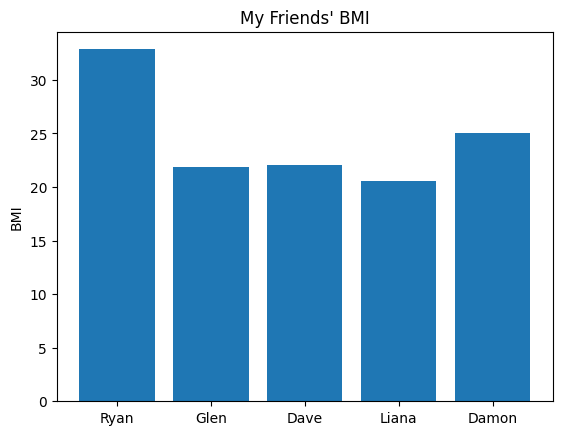

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(names,bmi)
plt.title("My Friends' BMI")
plt.ylabel("BMI")
plt.show()

The barplot above shows us a colour mapped visual representation of a list of 5 individuals' BMI. We can see that if an individual has a higher BMI that corresponds to a darker colour. 

## Question 4
As defined by the WHO the BMI ranges are:  
<ol>
    <li>Under Weight : < 18.5</li>
    <li>Normal Weight : 18.5-24.9 </li>
    <li>Over Weight : 25-29.9 </li>
    <li>Obese : > 30 </li>
</ol>  
Below is a segment of code that takes a persons BMI and returns their BMI Class. 

In [26]:
def BMIWeightClass(bmi):
    weightClass = ""
    if(bmi<18.5): weightClass = "is under weight."
    elif(bmi<25): weightClass = "is a normal weight."
    elif(bmi<30): weightClass = "is over weight."
    else: weightClass = "is obese."
    return weightClass

for i in range(0,len(names)):
    print(f"{names[i]} has a BMI of {bmi[i]} which {BMIWeightClass(bmi[i])}")
    i+=1

Ryan has a BMI of 32.85 which is obese.
Glen has a BMI of 21.91 which is a normal weight.
Dave has a BMI of 22.09 which is a normal weight.
Liana has a BMI of 20.57 which is a normal weight.
Damon has a BMI of 25.0 which is over weight.


The above function takes a BMI and compares that to a series of conditional checks, it then outputs a string stating whether the person is underweight,normal,over or obese.  
The for loop just loops through the names and passes the corresponding BMI to the BMIWeightClass function and prints the name and classification. 

## Question 5
BMI is a widely addopted metric to determine whether a person's weight is in a healthy range. There are some short comings of using BMI to determine health including
<ol>
    <li>The BMI just uses the mass of the person. If that person has a high percentage of muscle when compared to their body fat they can incorrectly be classified as overweight or even obese. </li>
    <li>As shown in the wikipedia article certain populations (listed include Japanese, Hong Kong, etc) should not be measured against Caucasian BMI standards. Genetic, biological and cultural factors can change a populations healthy weight range. </li>
    <li>A person within a healthy weight range according to their BMI may have underlying health issues that become overlooked as they percieve that they are 'healthy'. As biological and genetic factors can effect a persons weight they may not have a healthy diet but remain within a healthy weight range.</li>
    <li>Individuals a number of standard deviations outside the average height can have incorrect BMI readings.</li>
</ol>

Further to these points listed, BMI can have adverse effects on a persons mental health. If they are incorrectly categorised as overweight or obese and do not understand the factors above they may develop self esteem issues surrounding their weight. This can lead to future problems with diet, exercise and weight loss in the future.  

BMI should not be taken as a sole measure of health. High processed foods and high sugar diets are a leading factor to weight gain in western society. For a lot of people a healthy diet and moderate exercise of around 150 minutes a week can lead to a healthy lifestyle. 

# Post Grad Extension Tasks
# Question 1

The BMI Prime is a ratio that takes a persons BMI and compares that to the upper limit of an optimal BMI ($kg/m^2 $).  
BMI Prime is defined as $$ BMI_p = BMI/25$$  
This will return a ratio, above or below 1. $(1-BMI_p)*100$ will be the percentage above or below that upper limit a person is.  
Below is a function that returns an individuals $BMI_p$

In [27]:
def BMIPrime(bmiNum):
    upperBMILim = 25
    return bmiNum/upperBMILim

BMIp = []
for i in range(0,len(names)):
    BMIp.append(BMIPrime(bmi[i]))  

The above function takes a bmiNum (the bmi of the person) divides that by the upper BMI Limit of 25 and returns that value. The for loop loops through the elements of the bmi list and calls the BMIPrime function, and rounds the returned value to 2 decimal places for readability. It also fills a new list BMIp with the created values.
The results of this show that a person within a healthy BMI range should have a $BMI_p$ value less than 1, and a person within a overweight/obese BMI range should have a $BMI_p$ greater than or equal to 1.

# Question 2

Below we can see a barplot of each persons' BMI prime value. 

Text(0, 0.5, 'BMI prime')

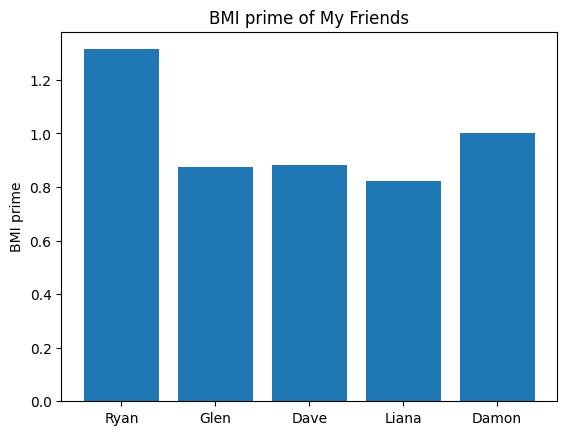

In [ ]:
plt.bar(names, BMIp)
plt.title("BMI prime of My Friends")
plt.ylabel("BMI prime")

# Question 3

The below code outputs a person's name, their BMI, their BMI category and their BMI prime. 

In [29]:
for i in range(0,len(names)):
    print(f"{names[i]} has a BMI of {bmi[i]} which is {BMIWeightClass(bmi[i])} They have a BMI prime index of {round(BMIp[i], 2)}")

Ryan has a BMI of 32.85 which is is obese. They have a BMI prime index of 1.31
Glen has a BMI of 21.91 which is is a normal weight. They have a BMI prime index of 0.88
Dave has a BMI of 22.09 which is is a normal weight. They have a BMI prime index of 0.88
Liana has a BMI of 20.57 which is is a normal weight. They have a BMI prime index of 0.82
Damon has a BMI of 25.0 which is is over weight. They have a BMI prime index of 1.0


# Question 4

The advantages of BMI prime include:
<ol>
    <li>BMI prime simplifies the metric. People can see quickly from the number whether they are above or below the optimal weight of 25 kg.</li>
    <li>People can quickly see by the magnitude of the number above or below 1 how far from the optimal range they are, they do not have to refer to or remember the table of figures to determine if they are within a healthy BMI range.</li>
</ol>  
The disadvantages of BMI prime include:
<ol>
    <li>All the disadvantages of BMI persist with BMI prime. A densly muscled person, a very tall or short person or a person of a different population could be falsely categorised as over or underweight. </li>
    <li>The simplification of the metric, while easy to parse, reduces any nuance in the BMI even further.</li>
    <li>Due to the fixed value of 25 kg/m^2 if that figure changes previously recorded BMI primes cannot be accurately compared to new values (this could have application with a patients medical history)</li>
</ol>  